Testing AutoEncoder

torch.Size([16, 3, 28, 28]) torch.Size([16, 3, 14, 14]) torch.Size([16, 3, 28, 28])
tensor([ 0.0413,  0.0007,  0.1112,  0.0109, -0.0105,  0.0226, -0.0485, -0.0230,
        -0.0148,  0.0046, -0.0513,  0.0563,  0.0110, -0.0235, -0.0082,  0.0144],
       device='cuda:0', grad_fn=<MeanBackward1>)
tensor([1.0652, 0.9241, 1.0649, 0.8477, 1.0078, 1.0727, 0.7146, 0.9135, 0.6596,
        1.0503, 0.8805, 1.2714, 0.9267, 0.9933, 0.6129, 1.0440],
       device='cuda:0', grad_fn=<StdBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.58417743..3.0007799].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.615827..3.0167427].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.57353747..2.9846778].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5283145..3.028034].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5964088..3.0015821].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.60460037..2.9612715].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.50134

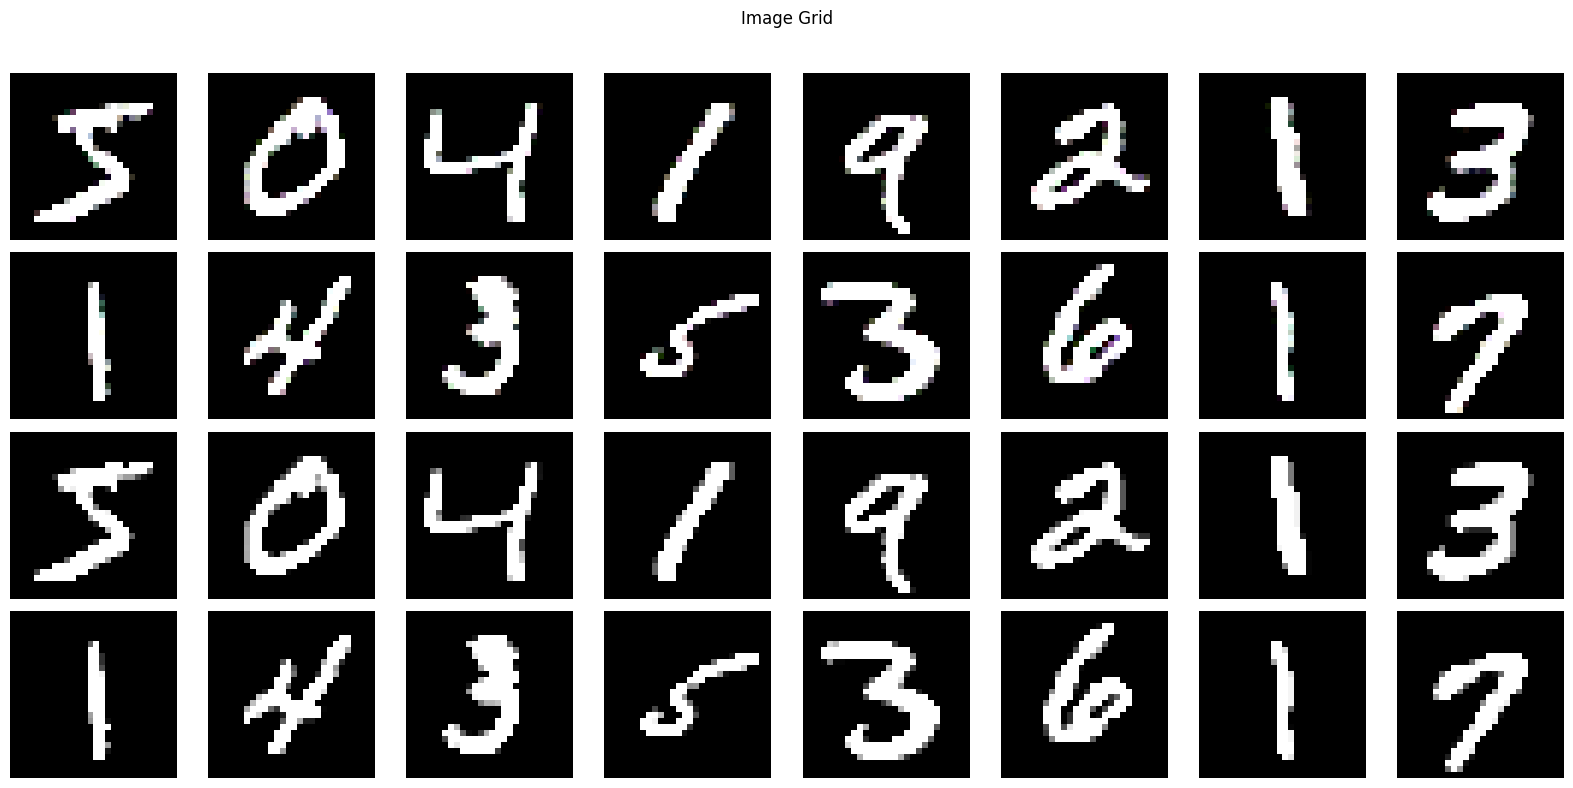

In [2]:
import torch
from utils import plot_image_grid

image_file = "data/mnist_tensor3.pth"
image_tensor = torch.load(image_file)

bs = 16
X = image_tensor[:bs].cuda()

enc = torch.load("model_collection/enczmuv.pth", weights_only=False)
dec = torch.load("model_collection/deczmuv.pth", weights_only=False)
enc.eval(), dec.eval()

z = enc(X)
Y = dec(z)

print(X.shape, z.shape, Y.shape)
print(z.mean(dim=(1, 2, 3)))
print(z.std(dim=(1, 2, 3)))
plot_image_grid(torch.concat([Y,X]))


Demo Noising Process & Test Noising Parameters

[0.999, 0.9978044096385542, 0.9964138950596603] [0.001691966855659895, 0.0016077014702099417, 0.0015273163966994445] 0.0015273163966994445 250


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5710113..2.9625435].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5675961..3.145564].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5690304..3.3025894].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5641322..3.4262967].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5812388..3.5163977].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5675173..3.5724459].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5655736

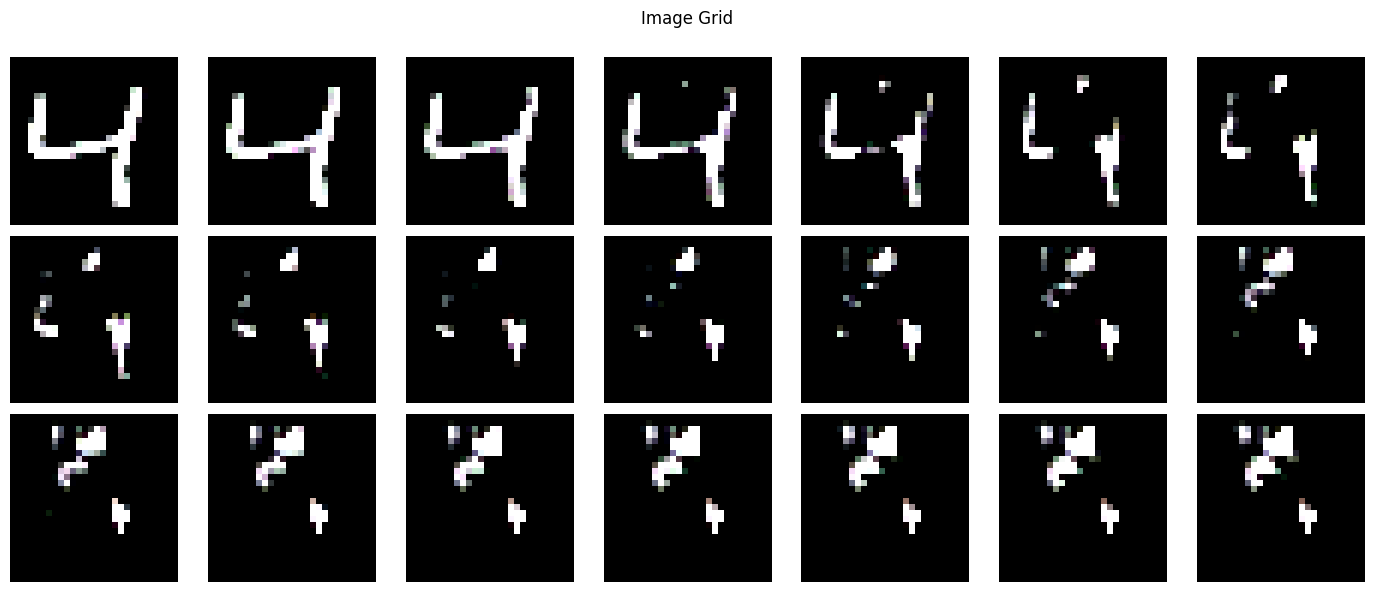

In [3]:
from utils import generate_alpha_bar
import math
from diffusion_config import Timesteps, Beta_0, Beta_T

T = Timesteps
beta_0 = Beta_0
beta_T = Beta_T

a_bar = generate_alpha_bar(beta_0, beta_T, T)
print(a_bar[:3], a_bar[-3:], a_bar[-1], len(a_bar))

demo = image_tensor[2].unsqueeze(0).repeat(T, 1, 1, 1).cuda()
z = enc(demo)
noise = torch.randn_like(z[0])

for i in range(T): 
    z_corrupted = math.sqrt(a_bar[i]) * z[0] + math.sqrt(1-a_bar[i]) * noise
    z[i] = z_corrupted

output = dec(z)
plot_image_grid(output[::12])

Dataset Maker

In [7]:
from tqdm import tqdm


image_tensor = torch.load("data/mnist_tensor3.pth")
label_tensor = torch.load("data/mnist_labels.pth")

z_set = []
n_set = []
t_set = []
l_set = []

N = 100

def random_integer(mi, ma): 
    return torch.randint(mi,ma,(1,))[0].item()

for i in tqdm(range(N)): 
    time = random_integer(0,T)

    idx = random_integer(0,image_tensor.shape[0])
    x = image_tensor[idx].cuda()
    z = enc(x)
    noise = torch.randn_like(z)
    z_corrupted = math.sqrt(a_bar[time]) * z + math.sqrt(1-a_bar[time]) * noise

    z_set.append(z_corrupted.cpu().unsqueeze(0))
    n_set.append(noise.cpu().unsqueeze(0))
    t_set.append(torch.tensor([time]))
    l_set.append(torch.tensor([label_tensor[idx]]))

z_set, n_set, t_set, l_set = torch.concat(z_set), torch.concat(n_set), torch.concat(t_set), torch.concat(l_set)
print(z_set.shape, n_set.shape, t_set.shape, l_set.shape)

torch.save(z_set, "training_set/z_set.pth")
torch.save(n_set, "training_set/n_set.pth")
torch.save(t_set, "training_set/t_set.pth")
torch.save(l_set, "training_set/l_set.pth")

100%|██████████| 100/100 [00:00<00:00, 345.33it/s]

torch.Size([100, 3, 14, 14]) torch.Size([100, 3, 14, 14]) torch.Size([100]) torch.Size([100])


Viewing Samples of Dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.640827..3.2014558].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6278664..3.2415314].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.627943..3.3636405].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7532166..3.2335992].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6893769..2.892133].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6951596..3.3942995].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.58595824.

torch.Size([100, 3, 14, 14]) torch.Size([100, 3, 14, 14]) torch.Size([100]) torch.Size([100])
tensor([[175,  51,  65,  65],
        [102, 196, 227,  33],
        [ 57,  46,  97, 160],
        [108,  58,  27, 214]])
tensor([[1, 0, 1, 9],
        [7, 0, 4, 0],
        [2, 9, 4, 5],
        [3, 7, 0, 4]])


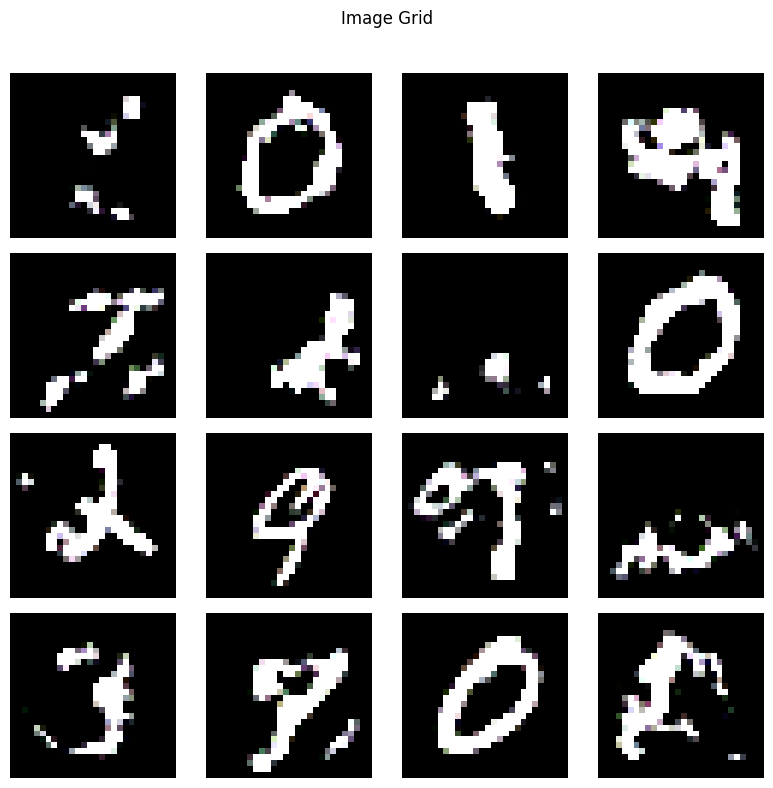

In [8]:
z_set = torch.load("training_set/z_set.pth")
n_set = torch.load("training_set/n_set.pth")
t_set = torch.load("training_set/t_set.pth")
l_set = torch.load("training_set/l_set.pth")
print(z_set.shape, n_set.shape, t_set.shape, l_set.shape)

t_subset = t_set[:16]
l_subset = l_set[:16]
z_subset = z_set[:16]
print(t_subset.view(4,4))
print(l_subset.view(4,4))

x_subset = dec(z_subset.cuda())
plot_image_grid(x_subset)